In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic regression

Useful links:

* https://en.wikipedia.org/wiki/Logistic_regression


Set a seed for reproducibility:

In [96]:
SEED = 42

In [97]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(SEED)

## Sigmoid activation

The sigmoid (activation) function is defined as

$$
\phi(z) = \sigma(z) = \frac{1}{1 + e^{-z}}.
$$

For a training example $(\mathbf{x}, y)$, the output of the perceptron represents the probability of the class $y = 1$ given the input $\mathbf{x}$ and is given by

$$
\hat{y} = \frac{1}{1 + e^{-\mathbf{w} \cdot \mathbf{x}}}.
$$

Probability of x being in class 1: 0.8021838885585817


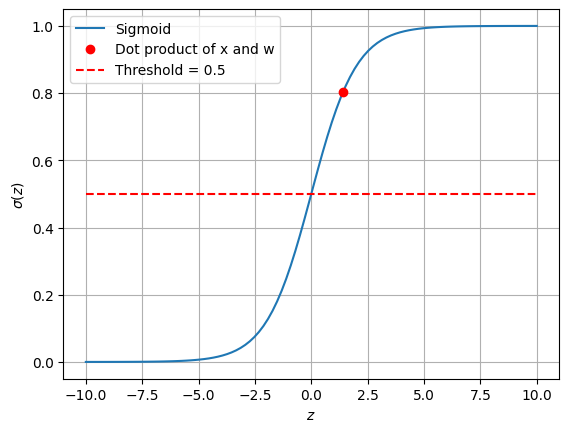

In [98]:
z = np.linspace(-10, 10, 100)
sigmoid_fn = lambda z: 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid_fn(z), label="Sigmoid")


# 3-real value
x = np.array([1, 2, 3])
w = np.array([0.1, 0.2, 0.3])
zx = np.dot(x, w)
probx = sigmoid_fn(zx)

print(f"Probability of x being in class 1: {probx}")

plt.plot(zx, probx, "ro", label="Dot product of x and w")
plt.hlines(0.5, -10, 10, color="red", linestyle="--", label="Threshold = 0.5")
plt.xlabel("$z$")
plt.ylabel("$\sigma(z)$")
plt.grid()
plt.legend()
plt.show()

Probability of x1 being in class 1: 0.8021838885585817
Probability of x2 being in class 1: 0.9426758241011313
Probability of x3 being in class 1: 0.9852259683067269


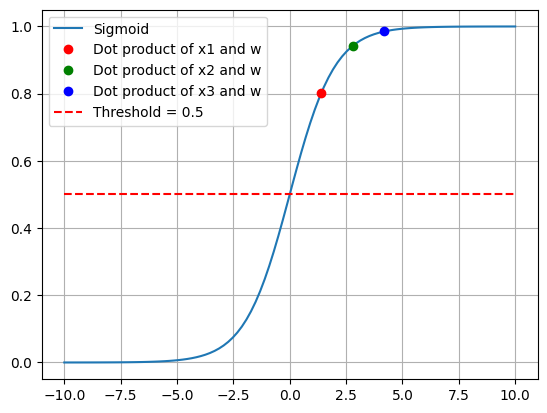

In [99]:
plt.plot(z, sigmoid_fn(z), label="Sigmoid")

# 3-real value
x1 = np.array([1, 2, 3])
x2 = 2 * x1
x3 = 3 * x1
w = np.array([0.1, 0.2, 0.3])
probx1 = sigmoid_fn(np.dot(x1, w))
probx2 = sigmoid_fn(np.dot(x2, w))
probx3 = sigmoid_fn(np.dot(x3, w))

print(f"Probability of x1 being in class 1: {probx1}")
print(f"Probability of x2 being in class 1: {probx2}")
print(f"Probability of x3 being in class 1: {probx3}")

plt.plot(np.dot(x1, w), probx1, "ro", label="Dot product of x1 and w")
plt.plot(np.dot(x2, w), probx2, "go", label="Dot product of x2 and w")
plt.plot(np.dot(x3, w), probx3, "bo", label="Dot product of x3 and w")

plt.hlines(0.5, -10, 10, color="red", linestyle="--", label="Threshold = 0.5")
plt.grid()
plt.legend()
plt.show()

## Cross-entropy loss

The cross-entropy (general) of two probability distributions $p$ and $q$ defined over a discrete variable $i$ is given by

$$
H(p, q) = -\sum_i p_i \log(q_i).
$$

In machine learning, $p$ represents the true distribution and $q$ is the predicted distribution. For *logistic regression*, given a sample $(\mathbf{x}, y)$, the distributions $p$ and $q$ are given by

$$
p_1 = y, \quad q_1 = \hat{y}, \quad p_0 = 1 - y, \quad q_0 = 1 - \hat{y}.
$$ 

The cross-entropy loss is then defined as

$$
\begin{aligned}
L & = -[p_0 \log(q_0) + p_1 \log(q_1)] \\
  & = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})].
\end{aligned}
$$ 

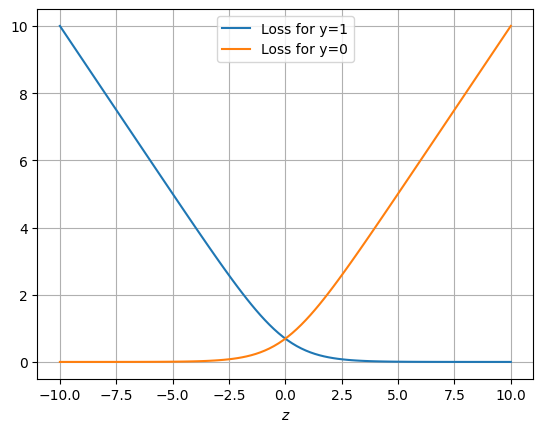

In [100]:
loss_positive = -np.log(sigmoid_fn(z))
loss_negative = -np.log(1 - sigmoid_fn(z))
plt.plot(z, loss_positive, label="Loss for y=1")
plt.plot(z, loss_negative, label="Loss for y=0")
plt.xlabel("$z$")
plt.grid()
plt.legend()
plt.show()

## Optimization model

As explained in the previous section, the sigmoid function is given by

$$
\begin{aligned}
\hat{y} & = \frac{1}{1 + e^{-z}} \\
        & = \frac{1}{1 + e^{-\mathbf{w} \cdot \mathbf{x}}}.
\end{aligned}
$$

The cross-entropy loss function is

$$
L = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})].
$$

### Sigmoid derivative

The derivative of the sigmoid function has a simple form:

$$
\frac{d\sigma(z)}{dz} = \sigma(z) (1 - \sigma(z)).
$$

### Loss derivative

Applying the chain rule, the gradient of the loss function with respect to the weights is

$$
\begin{aligned}
\frac{\partial L}{\partial \mathbf{w}} & = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \mathbf{w}}\\
& = \frac{\partial L}{\partial \hat{y}} \frac{d\hat{y}}{dz} \frac{\partial z}{\partial \mathbf{w}}\\
& = -\left[ y \frac{1}{\hat{y}} - (1 - y) \frac{1}{1 - \hat{y}} \right] [\hat{y} (1 - \hat{y})] \mathbf{x}\\
& = -\left[ y (1 - \hat{y}) - (1 - y) \hat{y} \right] \mathbf{x}\\
& = -\left[ y - y \hat{y} - \hat{y} + y \hat{y} \right] \mathbf{x}\\
& = -\left[ y - \hat{y} \right] \mathbf{x}.
\end{aligned}
$$

This is the same result as the one obtained for the identity activation function.



## Logistic regression algorithm

The logistic regression algorithm is:

1. Initialize the weights $\mathbf{w}$.
2. For each training example $\mathbf{x}$:
    1. Compute the output $\hat{y} = \frac{1}{1 + e^{-\mathbf{w} \cdot \mathbf{x}}}$ (different from the perceptron algorithm).
    2. Update the weights $\mathbf{w} = \mathbf{w} + \alpha (y - \hat{y}) \mathbf{x}$.

Train set size: 80
Test set size: 20
ymin: 0, ymax: 1


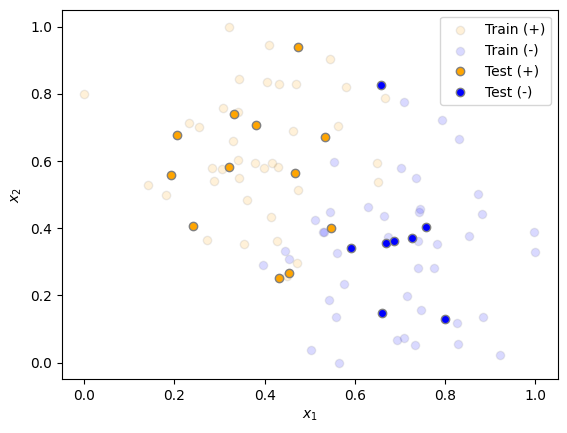

In [101]:
from utils import make_classification_dataset, plot_classification_dataset_2D
from utils import min_max_scaler
# from utils import standard_scaler
from sklearn.model_selection import train_test_split

X, y = make_classification_dataset(100, 2, 2, cluster_std=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize X
X_train, min_val, max_val = min_max_scaler(X_train)
X_test, _, _ = min_max_scaler(X_test, min_val, max_val)

# # Standardize X
# X_train, mean, std = standard_scaler(X_train)
# X_test, _, _ = standard_scaler(X_test, mean, std)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

print(f"ymin: {y.min()}, ymax: {y.max()}")

fig, ax = plt.subplots()
plot_classification_dataset_2D(
    X_train, y_train, ax=ax, negative_label=0, alpha=0.15, labels=["Train (+)", "Train (-)"]
)
plot_classification_dataset_2D(
    X_test, y_test, ax=ax, negative_label=0, labels=["Test (+)", "Test (-)"]
)

### Training

w.shape: (3,)


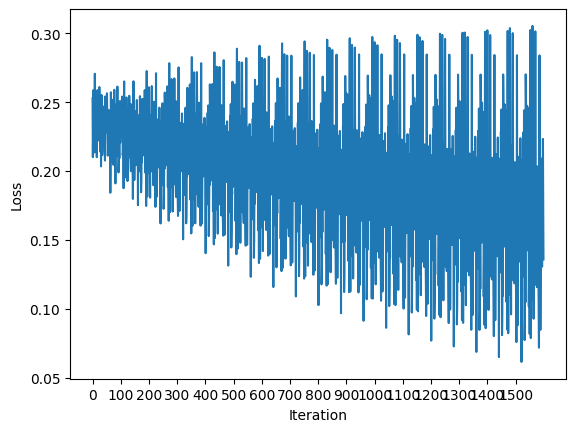

In [102]:
from utils import plot_loss_history

num_epochs = 20
learning_rate = 1e-02

# Add a bias term
X_b = np.hstack([X_train, np.ones((X_train.shape[0], 1))])

# Random weights initialization
w = np.random.normal(size=X_b.shape[1])
print(f"w.shape: {w.shape}")

iteration = 0
loss_history = []
for epoch in range(num_epochs):
    for i in range(len(X_b)):
        # sigmoid_fn
        y_pred = sigmoid_fn(np.dot(X_b[i], w))
        
        # Loss
        loss_value = (y_train[i] - y_pred) ** 2
        loss_history.append(loss_value)

        # Update weights
        w = w + learning_rate * (y_train[i] - y_pred) * X_b[i]

        iteration += 1
plot_loss_history(loss_history, interval=100)

### Test

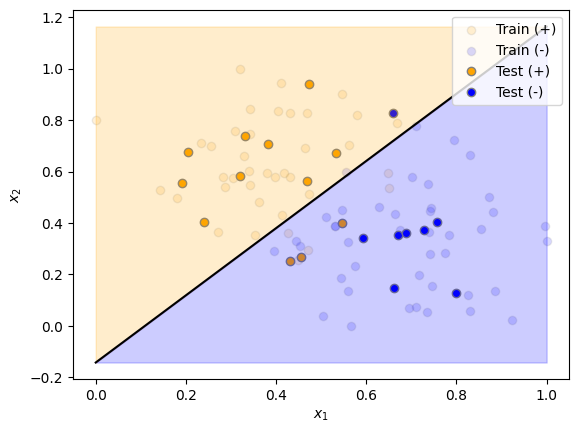

In [103]:
from utils import plot_decision_boundary_2D, plot_classification_dataset_2D


# Concatenate train and test sets
X = np.vstack((X_train, X_test))

fig, ax = plt.subplots()
plot_classification_dataset_2D(
    X_train, y_train, ax=ax, negative_label=0, alpha=0.15, labels=["Train (+)", "Train (-)"]
)
plot_classification_dataset_2D(
    X_test, y_test, ax=ax, negative_label=0, labels=["Test (+)", "Test (-)"]
)

# plot_classification_dataset_2D(X_test, y_test, negative_label=0, ax=ax)
# plot_classification_dataset_2D(X, y, negative_label=0, alpha=0.15, ax=ax)
plot_decision_boundary_2D(X, w, ax=ax)

plt.show()

#### Classification report

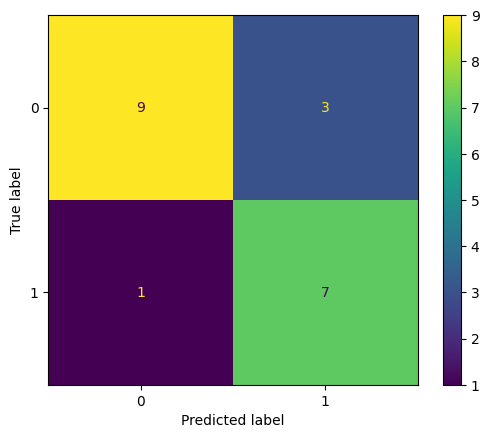


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.70      0.88      0.78         8

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



In [104]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# X_test with bias term
X_b = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
# vectorized prediction
y_pred = sigmoid_fn(np.dot(X_b, w)) # dot product with the last axis of w: n x d * d x 1 = n x 1
y_pred = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Compute classification report
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)

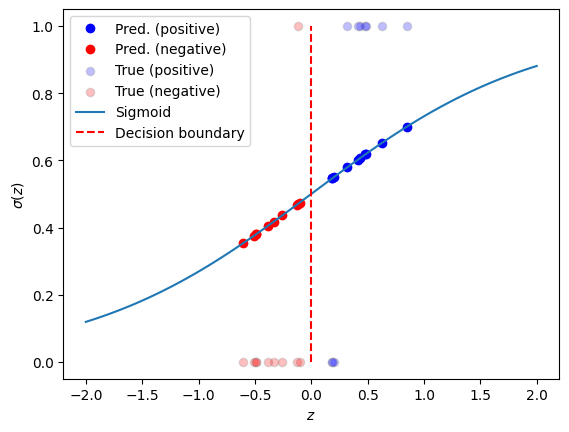

In [105]:
z_chart = np.linspace(-2, 2, 100)
y_sig = sigmoid_fn(z_chart)

z = np.dot(X_b, w)
y_pred = sigmoid_fn(z)


plt.plot(z[z>0], y_pred[z>0], "bo", label="Pred. (positive)")
plt.plot(z[z<=0], y_pred[z<=0], "ro", label="Pred. (negative)")
plt.scatter(
    z[z > 0],
    y_test[z > 0],
    label="True (positive)",
    alpha=0.25,
    color="blue",
    edgecolor="gray",
)
plt.scatter(
    z[z < 0],
    y_test[z < 0],
    label="True (negative)",
    alpha=0.25,
    color="red",
    edgecolor="gray",
)
plt.plot(z_chart, y_sig, label="Sigmoid")
plt.vlines(0, 0, 1, color="red", linestyle="--", label="Decision boundary")
plt.xlabel("$z$")
plt.ylabel("$\sigma(z)$")
plt.legend()
plt.show()